In [93]:
import pandas as pd
import json_lines
import json

# Задание 1. Считываем jsonlines построчно и считаем объекты

In [94]:
data = []

In [95]:
with open('dotadata.jsonl') as f:
    for line in f:
        data.append(json.loads(line))

In [96]:
df = pd.DataFrame.from_dict(data)

In [97]:
df.head()

,assists,attackerhero,attackerillusion,attackername,attackerteam,camps_stacked,creeps_stacked,deaths,denies,ehandle,...,unit_list,value,valuename,vec_x,vec_y,x,xp,xp_reason,y,z
0,NaN,False,False,dota_unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,False,False,dota_unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В задании говорится о построчном чтении, тем не менее есть возможность сделать это быстрее с помощью встроенной команды в pandas.

In [165]:
df2 = pd.read_json('dotadata.jsonl', lines = True, orient= 'records')

In [172]:
df2.head()

,assists,attackerhero,attackerillusion,attackername,attackerteam,camps_stacked,creeps_stacked,deaths,denies,ehandle,...,unit_list,value,valuename,vec_x,vec_y,x,xp,xp_reason,y,z
0,NaN,0.0,0.0,dota_unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,0.0,dota_unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,null,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посчитаем кол-во каждого объекта типа и сохраним результат в json файл

In [6]:
types = df.type.value_counts().to_json()
with open('types.json', 'w') as outfile:  
    json.dump(types, outfile)

Читаем полученный файл

In [7]:
with open('types.json', 'r') as f:
    data_types = json.loads(json.load(f))

In [8]:
df_types = pd.DataFrame.from_dict(data_types, orient= 'index')
df_types

,0
camera,550909
cursor,550909
actions,85322
interval,68050
DOTA_COMBATLOG_DAMAGE,30699
DOTA_COMBATLOG_MODIFIER_ADD,8068
DOTA_COMBATLOG_MODIFIER_REMOVE,7862
DOTA_COMBATLOG_XP,3724
DOTA_COMBATLOG_DEATH,3430
DOTA_COMBATLOG_HEAL,3146


# Задание 2. Строим heatmap

In [98]:
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import mlab as ml
import numpy as np
%matplotlib inline

In [99]:
for i in range(0,10):
    df_cursor = df.loc[(df['type'] == 'cursor') &(df['slot'] == i)][['x', 'y']]
    df_heatmap = df_cursor.groupby(["x", "y"]).size().reset_index(name="times")
    hero = df.loc[df['slot'] == i].dropna(axis =1, how = 'all')['unit'].value_counts().index[0]
    title = " ".join(hero.split('_')[3:])
    plt.hexbin(df_heatmap.y,df_heatmap.x, gridsize = 30, cmap=cm.jet)
    plt.axis([df_heatmap.y.max(), df_heatmap.y.min(),df_heatmap.x.min(), df_heatmap.x.max() ])
    plt.title(title)
    cb = plt.colorbar()
    cb.set_label('mean value')
    plt.savefig('heatmap_'+str(i)+'.png', bbox_inches='tight')
    plt.clf()
    print(i, hero) 

0 CDOTA_Unit_Hero_EarthSpirit
1 CDOTA_Unit_Hero_Axe
2 CDOTA_Unit_Hero_Shadow_Demon
3 CDOTA_Unit_Hero_Tinker
4 CDOTA_Unit_Hero_Luna
5 CDOTA_Unit_Hero_Dazzle
6 CDOTA_Unit_Hero_Silencer
7 CDOTA_Unit_Hero_Chen
8 CDOTA_Unit_Hero_SandKing
9 CDOTA_Unit_Hero_Terrorblade


# Задание 3. Тест на равенство среднего для времени покупки БФ в двух последних патчах.

In [180]:
import requests as req
import urllib
from scipy.stats import ttest_ind
import seaborn as sns

In [181]:
a = """
SELECT
match_logs.time ,
matches.match_id,
matches.start_time,
((player_matches.player_slot < 128) = matches.radiant_win) win,
player_matches.hero_id,
player_matches.account_id,
leagues.name leaguename
FROM matches
JOIN match_patch using(match_id)
JOIN leagues using(leagueid)
JOIN player_matches using(match_id)
JOIN heroes on heroes.id = player_matches.hero_id
LEFT JOIN notable_players ON notable_players.account_id = player_matches.account_id AND notable_players.locked_until = (SELECT MAX(locked_until) FROM notable_players)
LEFT JOIN teams using(team_id)
JOIN match_logs
ON match_logs.match_id = matches.match_id 
AND player_matches.player_slot = match_logs.targetname_slot 
AND match_logs.type = 'DOTA_COMBATLOG_PURCHASE'
AND match_logs.valuename = 'item_bfury'
WHERE TRUE
AND match_logs.time IS NOT NULL
AND match_patch.patch >= '{0}'
AND match_patch.patch <= '{1}'
AND player_matches.hero_id = 1
AND leagues.tier = 'professional'
ORDER BY match_logs.time ASC NULLS LAST
LIMIT 1000
"""

In [182]:
quer1 = urllib.parse.quote(a.format('7.06', '7.06'))
quer2 = urllib.parse.quote(a.format('7.07', '7.07'))

In [183]:
bd06 = 'https://api.opendota.com/api/explorer?sql={}'.format(quer1)
bd07 = 'https://api.opendota.com/api/explorer?sql={}'.format(quer2)

In [184]:
data06 = req.get(bd06).json()
data07 = req.get(bd07).json()

In [185]:
time06 = pd.DataFrame(data06['rows']).time
time07 = pd.DataFrame(data07['rows']).time

In [186]:
time06.name = '7.06'
time07.name = '7.07'

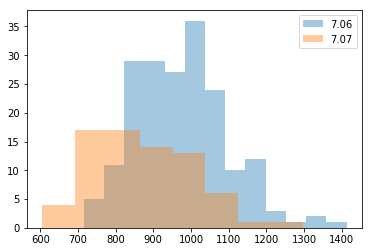

In [187]:
sns.distplot(time06, axlabel= False, label = time06.name, kde=False)
sns.distplot(time07, axlabel= False, label = time07.name, kde=False)
plt.legend();

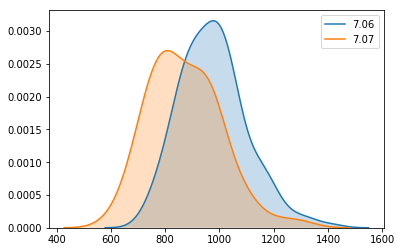

In [188]:
sns.kdeplot(time06, shade=True)
sns.kdeplot(time07, shade=True)

In [189]:
print(ttest_ind(time06,time07))
print(time07.mean() - time06.mean())

Ttest_indResult(statistic=6.0503088515269345, pvalue=4.9943353542008352e-09)
-104.68240807498205


Гипотеза о равенстве средних для времени покупки БФ в двух последних патчах отвергается. В патче 7.07 время покупки БФ сократилось в среднем на 104 секунды, то есть на минуту и 44 секунды.

# Задание 4. Строим регрессию

In [190]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Сначала отберем нужные нам показатели и преобразуем данные

In [191]:
df_reg = df.loc[df['type'] == 'interval'][['gold', 'time', 'slot']]

In [192]:
x = df_reg.time.values.reshape(len(df_reg.time.values), 1)
y = df_reg.gold.values.reshape(len(df_reg.time.values), 1)

Строим модель

In [193]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [194]:
gold_pred = regr.predict(x)

Посмотрим на константу, коэфиициент бета при переменной времени, среднюю квадратичную ошибку и R квадрат.

In [195]:
print('Estimated intercept: \n', regr.intercept_)
print('Coefficient: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y, gold_pred))
print('Variance score: %.2f' % r2_score(y, gold_pred))

Estimated intercept: 
 [-3867.9249215]
Coefficient: 
 [[ 5.8808763]]
Mean squared error: 13256317.95
Variance score: 0.72


Ну и для наглядности визуализируюем данные диаграммой рассеяния. Кстати, на ней хорошо видно значения отдельных игроков. Еще, есть подозрение, что в начале файла есть много строк, которые не описывают состояние казны игроков из-за того, что это capitans mode.

([], <a list of 0 Text xticklabel objects>)

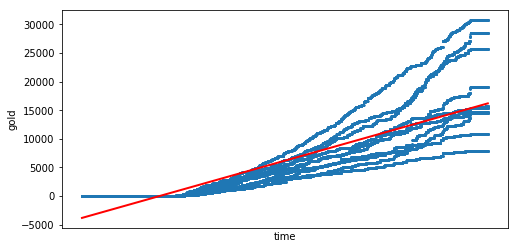

In [196]:
fig, axs = plt.subplots(1, 1)
df_reg.plot(kind='scatter', x='time', y='gold', ax=axs, figsize=(8, 4), s=2)
plt.plot(x, gold_pred, color='red', linewidth=2)
plt.xticks(())

В приницпе можно построить регрессионную модель и другим способом. На мой взгляд выдача более понятная, хотя функционал sklearn все же на порядк выше.

In [197]:
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est1 = est.fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                 1.713e+05
Date:                Wed, 27 Dec 2017   Prob (F-statistic):               0.00
Time:                        18:28:11   Log-Likelihood:            -6.5457e+05
No. Observations:               68050   AIC:                         1.309e+06
Df Residuals:                   68048   BIC:                         1.309e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3867.9249     28.021   -138.037      0.0

Константа получилась какой-то странной, будто в нулевой отрезок времени у игроков -3.8к на руках, но скорее всего это из-за формата датафрейма и режима игры. Чуть позже мы посмотрим, действительно ли в начале что-то не так и попытаемся исправить. Из-за этого вероятно изменится и наклон, но пока посмотрим на то, что есть. 

Коэффициент при первом предикторе time значим (p-value < 0.01), что не удивитльно хотя бы потому, что деньги это прямая функция от времени + ластхитов + убийств. R квадрат большой, можно проинтерпретировать это с точки зрения того, что игроки в среднем одинаково эффективно фармят, раз такая значительная часть вариации объясняется одним временем. Пока не понятно, нужно ли использовать интерсепт, потому что сначала нужно разобраться с началом датафрейма, но опыт подсказывает, что констатнту можно не учитывать. (Вообще кажется нет случаев, когда константу прямо обязательно удалять из линейной модели, потому что оставить ее можно хотя бы чтобы сохранить стандартное нормальное распределение ошибок)

Заход №2. С позволения я выкину в начале 15820 наблюдений с нулевым показателем золота. 

In [198]:
df_reg_fix = df_reg.loc[df['gold'] > 0]

In [199]:
x_f = df_reg_fix.time.values.reshape(len(df_reg_fix.time.values), 1)
y_f = df_reg_fix.gold.values.reshape(len(df_reg_fix.time.values), 1)

In [200]:
regr_fix = linear_model.LinearRegression()
regr_fix.fit(x_f, y_f)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [201]:
gold_fix_pred = regr_fix.predict(x_f)

In [202]:
print('Estimated intercept: \n', regr_fix.intercept_)
print('Coefficient: \n', regr_fix.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_f, gold_fix_pred))
print('Variance score: %.2f' % r2_score(y_f, gold_fix_pred))

Estimated intercept: 
 [-7510.54466824]
Coefficient: 
 [[ 7.39647969]]
Mean squared error: 14542157.25
Variance score: 0.68


([], <a list of 0 Text xticklabel objects>)

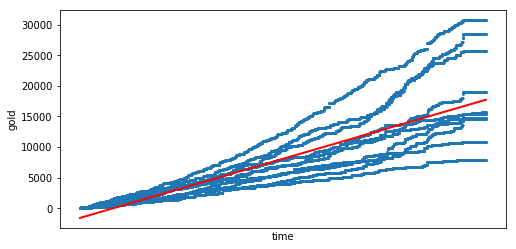

In [203]:
fig, axs = plt.subplots(1, 1)
df_reg_fix.plot(kind='scatter', x='time', y='gold', ax=axs, figsize=(8, 4), s=2)
plt.plot(x_f, gold_fix_pred, color='red', linewidth=2)
plt.xticks(())

На этом графике мы видим, что никакого длинного отрезка, когда золото всех игроков было равно 0, нет. Это также увеличило угол наклона линии регрессии (что не удивительно, поскольку временной отрезок сжался и при этом была исключена значительная часть наблюдений со стороны низких значений). Это также привело к снижению значения константы.

Время все также значимо, однако (как мы уже видели) его коэффициент вырос. Теперь за изменение времени на одну условную единицу ожидается в среднем изменение количество золота на 7.4 против 5.88 до удаления нулевых значений. Соответсвенно теперь условная "точка отсчета" лежит ниже, однако золото быстрее приростает со временем согласно модели. Такое значение константы делает невозможным предсказание количества золота у игроков примерно до 1015 единицы времени, поскольку предсказанное значение будет отрицательным.  

Помимио этого, значение R квадрата уменьшилось, но это нормально, не станем же мы претендовать на серьезный предсказательный потенциал с одним предиктором, находящимся в прямой зависимости с откликом (помимо этого есть еще и латентные факторы: больше время => больше крипов к этому моменту вышло на карту и заспаунилось в лесу, герой быстрее их убивает, поскольку сильнее, а также получает больше денег за убийсвто противников).

Поскольку оценки получаются неточными и вообще предсказывают отрицательное количество золота в начале игры, у нас есть два выхода:
1. Отказаться от принципа несмещенности оценок и построить модель без константы, потому что наши зависимая и независимая переменная по механике коллинеарны (хотя бы потому, что золото капает со временем, а также опыт, который увеличивает уровень, что позволяет эффективнее фармить большинству героев)
2. Стандартизировать показатели из-за того, что шкалы измерения несопоставимы (а шкала времени, если честно, совсем не понятная), а плюсом логарифмировать золото, поскольку (как видно из графиков, да и из опыта игры) оно очевидно приростает эспоненциально - больше золота и опыта -> больше итемов и уровень -> больше золота и опыта.

Модель без константы:

In [204]:
regr_noin = linear_model.LinearRegression(fit_intercept= False )
regr_noin.fit(x_f, y_f)
gold_fix_noint_pred = regr_noin.predict(x_f)
print('Estimated intercept: \n', regr_noin.intercept_)
print('Coefficient: \n', regr_noin.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_f, gold_fix_noint_pred))
print('Variance score: %.2f' % r2_score(y_f, gold_fix_noint_pred))

Estimated intercept: 
 0.0
Coefficient: 
 [[ 4.23455671]]
Mean squared error: 20952685.55
Variance score: 0.54


Как мы видим, в случае, если мы принимаем константу равной 0, наклон slope уменьшается. Это также избавляет нас от проболемы отрицательных предсказанных значений золота в начале игры. Однако, как уже говорилось мы получаем смещенные оценки.

<span style="color:red"> **Ну если делать все совсем по человечески, нужно стандартизировать время и золото, а золото еще и логрифмировать**</span>

In [205]:
x_f_std = (x_f - np.mean(x_f))/ np.std(x_f)
y_f_stdlog = (np.log(y_f) - np.mean(np.log(y_f))) / np.std(np.log(y_f))
regr_normal = linear_model.LinearRegression()
regr_normal.fit(x_f_std, y_f_stdlog)
gold_fix_normal_pred = regr_normal.predict(x_f_std)
print('Estimated intercept: \n', regr_normal.intercept_)
print('Coefficient: \n', regr_normal.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_f_stdlog, gold_fix_normal_pred))
print('Variance score: %.2f' % r2_score(y_f_stdlog, gold_fix_normal_pred))

Estimated intercept: 
 [  1.52529323e-15]
Coefficient: 
 [[ 0.84553614]]
Mean squared error: 0.29
Variance score: 0.71


# Задание 5. Анализ убийств героев

Датафрейм достаточно неочевидный без ключей к переменным, но разобраться в приницпе можно. Главное понять, что targetname это буквально юнит, которому наносится урон, а targetsourcename это герой, под контролем которого находится этот юнит, чтобы убрать все логи урона по иллюзиям ШД. Потом нужно понять, что источник урона и юнит, наносящий урон - это тоже разные понятия, но тут не надо ничего убирать, потому что если ШД наносит урон иллюзиями, а Чен крипами - они все равно участвуют в ганке.

In [101]:
df_kill = df.loc[((df['type'] == 'DOTA_COMBATLOG_DAMAGE') | (df['type'] == 'DOTA_COMBATLOG_DEATH')) & (df['targethero'] == True) & (df['targetillusion'] == False)].dropna(axis =1, how = 'all')
df_kill

,attackerhero,attackerillusion,attackername,attackerteam,inflictor,location,sourcename,targethero,targetillusion,targetname,targetsourcename,targetteam,tick,time,type,value
80887,True,False,npc_dota_hero_dazzle,3.0,dota_unknown,NaN,npc_dota_hero_dazzle,True,False,npc_dota_hero_axe,npc_dota_hero_axe,2.0,24010.0,796.92700,DOTA_COMBATLOG_DAMAGE,21.0
80921,True,False,npc_dota_hero_terrorblade,3.0,dota_unknown,NaN,npc_dota_hero_terrorblade,True,False,npc_dota_hero_axe,npc_dota_hero_axe,2.0,24012.0,796.96030,DOTA_COMBATLOG_DAMAGE,44.0
81433,True,False,npc_dota_hero_silencer,3.0,dota_unknown,NaN,npc_dota_hero_silencer,True,False,npc_dota_hero_earth_spirit,npc_dota_hero_earth_spirit,2.0,24042.0,798.02673,DOTA_COMBATLOG_DAMAGE,47.0
81472,True,False,npc_dota_hero_shadow_demon,2.0,shadow_demon_shadow_poison,NaN,npc_dota_hero_shadow_demon,True,False,npc_dota_hero_silencer,npc_dota_hero_silencer,3.0,24044.0,798.06006,DOTA_COMBATLOG_DAMAGE,18.0
81537,True,False,npc_dota_hero_shadow_demon,2.0,shadow_demon_shadow_poison,NaN,npc_dota_hero_shadow_demon,True,False,npc_dota_hero_sand_king,npc_dota_hero_sand_king,3.0,24048.0,798.19336,DOTA_COMBATLOG_DAMAGE,19.0
81571,True,False,npc_dota_hero_silencer,3.0,silencer_curse_of_the_silent,NaN,npc_dota_hero_silencer,True,False,npc_dota_hero_luna,npc_dota_hero_luna,2.0,24050.0,798.26000,DOTA_COMBATLOG_DAMAGE,10.0
81572,True,False,npc_dota_hero_silencer,3.0,silencer_curse_of_the_silent,NaN,npc_dota_hero_silencer,True,False,npc_dota_hero_earth_spirit,npc_dota_hero_earth_spirit,2.0,24050.0,798.26000,DOTA_COMBATLOG_DAMAGE,10.0
81749,True,False,npc_dota_hero_dazzle,3.0,dota_unknown,NaN,npc_dota_hero_dazzle,True,False,npc_dota_hero_axe,npc_dota_hero_axe,2.0,24060.0,798.59326,DOTA_COMBATLOG_DAMAGE,45.0
82059,True,False,npc_dota_hero_silencer,3.0,silencer_curse_of_the_silent,NaN,npc_dota_hero_silencer,True,False,npc_dota_hero_luna,npc_dota_hero_luna,2.0,24080.0,799.25977,DOTA_COMBATLOG_DAMAGE,10.0
82060,True,False,npc_dota_hero_silencer,3.0,silencer_curse_of_the_silent,NaN,npc_dota_hero_silencer,True,False,npc_dota_hero_earth_spirit,npc_dota_hero_earth_spirit,2.0,24080.0,799.25977,DOTA_COMBATLOG_DAMAGE,10.0


Поскольку герои могут обмениваться уроном в течение нескольких минут и не умирать, необходимо концептуализировать понятие ганка  и определить временные рамки - что мы считаем за ганк. В среднем на протяжении игры, убийство героя может занимать от 5 до 15 секунд (warning, assumptions), поэтому будем считать, что в убийстве принимали участие все герои, которые нанесли урон за 15 секунд до смерти. Естественно, нужно проверить, в секундах ли измеряется время в базе данных.

Посмотрим чему равна единица измерения шкалы времени. Поскольку я все еще уверен, что в начале есть некоторое количество строчек лога, которые не имеют непосредственного отношения к игровому процессу, будем смотреть на время в базе данных, которая учитывает наносимый урон. (На мой взгляд, это разумный подход: общая длительность матча отсчитывается с 00:00, в это же время спаунится банути-руна, за которую может случиться драка, саппорты примерно в это время идут ставить варды, встречать хардлайнера, который ставит варды и т.д. Все это делает вероятность того, что первый урон будет нанесен где-то в районе -00:15 - 00:15 очень высокой. Ну и поскольку это профессиональный матч, команда маловероятно написала "в трон, афк" и стояла на базе последние 5 минут, поэтому последний урон тоже вероятно был нанесен незадолго до конца игры).

При общей длительности матча 41:06, что равно  2466 секундам, одна единица времени равна:

In [7]:
print((df_kill.time.max() - df_kill.time.min()) / 2466)

1.00084071371


Да, это секунды! 

Создадим список героев, для которых будем анализировать смерти.

In [102]:
heroes = df_kill.targetname.value_counts().index.tolist()
heroes

['npc_dota_hero_terrorblade',
 'npc_dota_hero_axe',
 'npc_dota_hero_luna',
 'npc_dota_hero_silencer',
 'npc_dota_hero_sand_king',
 'npc_dota_hero_earth_spirit',
 'npc_dota_hero_dazzle',
 'npc_dota_hero_tinker',
 'npc_dota_hero_shadow_demon',
 'npc_dota_hero_chen']

Дальше все просто: для каждого героя из нашего списка создаем сабсет с полученным только им уроном и только его смертями, находим все строчки со смертью и достаем оттуда время, затем для каждой из смертей этого героя создаем сабсет со всем уроном за последние 15 секунд до непосредственно смерти и из него извлекаем время начала и конца ганка, жертву и участников. 

In [103]:
kills = pd.DataFrame(columns=['targethero', 'start_time', 'end_time', 'kill_participants'])
for hero in heroes:
    df_kill_hero = df_kill[df_kill['targetname'] == hero][['targetname','targetteam', 'sourcename','attackerteam', 'type','time', 'value']].reset_index()
    death_time = df_kill_hero[df_kill_hero.type == 'DOTA_COMBATLOG_DEATH'].time.tolist()
    for death in death_time:
        df_kill_hero_death = df_kill_hero[(df_kill_hero.time <= death) & (df_kill_hero.time > (death - 15))]
        killers = df_kill_hero_death.sourcename.unique().tolist()
        hkillers = [item for item in killers if item in heroes]
        kills = kills.append([{'targethero': df_kill_hero_death.targetname.tolist()[0],
               'start_time':df_kill_hero_death.time.tolist()[0],
               'end_time':df_kill_hero_death.time.tolist()[-1],
               'kill_participants':hkillers}],ignore_index= True)
kills = kills.sort_values(by = ['start_time']).reset_index(drop =True)
kills.head()

,targethero,start_time,end_time,kill_participants
0,npc_dota_hero_silencer,881.9729,889.43774,"[npc_dota_hero_earth_spirit, npc_dota_hero_tin..."
1,npc_dota_hero_silencer,945.2241,959.72060,"[npc_dota_hero_tinker, npc_dota_hero_earth_spi..."
2,npc_dota_hero_silencer,988.0803,1002.54346,"[npc_dota_hero_tinker, npc_dota_hero_earth_spi..."
3,npc_dota_hero_dazzle,1045.7329,1060.66260,"[npc_dota_hero_earth_spirit, npc_dota_hero_axe]"
4,npc_dota_hero_sand_king,1051.7648,1065.62800,"[npc_dota_hero_shadow_demon, npc_dota_hero_luna]"


In [104]:
kills_json = kills.to_json(orient= 'records')
with open('kills.json', 'w') as outfile:  
    json.dump(kills_json, outfile, sort_keys= False)

Attention! Axe зачем-то умер 5 раз вместо положенных 4.

In [105]:
df_kill_hero = df_kill[df_kill['targetname'] == 'npc_dota_hero_axe'][['targetname','targetteam', 'sourcename','attackerteam', 'type','time', 'value']].reset_index()
df_kill_hero.type.value_counts()

DOTA_COMBATLOG_DAMAGE    1029
DOTA_COMBATLOG_DEATH        5
Name: type, dtype: int64